In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tabulate import tabulate
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
import cv2
import numpy as np

x_pixels = 60 # Change Approprietly - Ratio should be 3/2
y_pixels = 40
pixels_shape = x_pixels*y_pixels

data_dir = "/content/drive/MyDrive/ML_EXs_datasets/ML - Final"  # Replace with the actual path to your dataset folder

X = []  # List to store resized images
y = []  # List to store corresponding labels

for label, folder_name in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        for image_filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_filename)
            # Load and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (x_pixels, y_pixels))
            # Append the resized image to X
            X.append(image)
            # Append the corresponding label to y
            y.append(label)

# Convert X and y to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

In [ ]:
# Create an empty array to store the grayscale images
X_gray = []

# Iterate through each image in X and convert it to grayscale
for image in X:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    X_gray.append(gray_image)

# Convert the list of grayscale images to a NumPy array
X_gray = np.array(X_gray)

# Check the shape of X_gray (it should be (2188, y_pixels, x_pixels))
print(X_gray.shape)

(2188, 40, 60)


In [ ]:
# Normalize the pixel values to the range [0, 1]
X_normalized = X_gray / 255.0

# # Verify that the pixel values are now in the range [0, 1]
# min_pixel_value = np.min(X_normalized)
# max_pixel_value = np.max(X_normalized)
# print("Minimum pixel value:", min_pixel_value)
# print("Maximum pixel value:", max_pixel_value)

In [ ]:
# Reshape X_normalized to (2188, 600)
X_reshaped = X_normalized.reshape(X_normalized.shape[0], -1)

# Check the shape of the resulting X_reshaped array
print("X_reshaped shape:", X_reshaped.shape)

X_reshaped shape: (2188, 2400)


In [ ]:
# Create a dictionary to map the old labels to the new labels
label_mapping = {0: 1, 1: 2, 2: 0}

# Use NumPy to apply the label transformation
y_transformed = np.vectorize(label_mapping.get)(y)

y =y_transformed

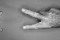

In [ ]:
# Replace 'index_to_display' with the index of the image you want to display
index_to_display = 4

# Display the image at the specified index
cv2_imshow(X_gray[index_to_display])

In [ ]:
y[index_to_display]

1

In [ ]:
# Split the dataset into 80% training and 20% testing with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, stratify=y, random_state=0)

# Check the shapes of the resulting train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1750, 2400)
X_test shape: (438, 2400)
y_train shape: (1750,)
y_test shape: (438,)


# CNN

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(pixels_shape,)),  # Input layer
    keras.layers.Reshape((y_pixels, x_pixels, 1)),  # Reshape to match input dimensions
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 30, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
55/55 [==============================] - 5s 80ms/step - loss: 1.0858 - accuracy: 0.4783 - val_loss: 0.9831 - val_accuracy: 0.5731
Epoch 2/20
55/55 [==============================] - 5s 91ms/step - loss: 0.7408 - accuracy: 0.7891 - val_loss: 0.6377 - val_accuracy: 0.8128
Epoch 3/20
55/55 [==============================] - 3s 61ms/step - loss: 0.5009 - accuracy: 0.8417 - val_loss: 0.4541 - val_accuracy: 0.8767
Epoch 4/20
55/55 [==============================] - 4s 64ms/step - loss: 0.3446 - accuracy: 0.9011 - val_loss: 0.3692 - val_accuracy: 0.8744
Epoch 5/20
55/55 [==============================] - 5s 88ms/step - loss: 0.3052 - accuracy: 0.9069 - val_loss: 0.3767 - val_accuracy: 0.8813
Epoch 6/20
55/55 [==============================] - 3s 59ms/step - loss: 0.2465 - accuracy: 0.9337 - val_loss: 0.3056 - val_accuracy: 0.9132
Epoch 7/20
55/55 [==============================] - 3s 59ms/step - loss: 0.1920 - accuracy: 0.9469 - val_loss: 0.2944 - val_accuracy: 0.9018
Epoch 8/20
55

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

14/14 [==============================] - 0s 13ms/step - loss: 0.2345 - accuracy: 0.9429
Test accuracy: 94.29%


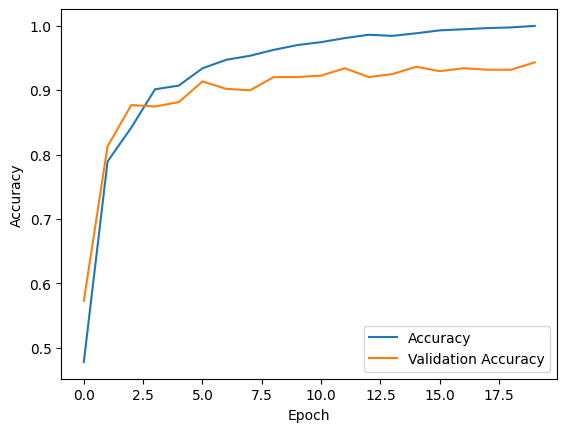

In [ ]:

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Game on

In [ ]:
import numpy as np
import random
import cv2
from sklearn.metrics import accuracy_score

N = 1000  # Number of turns
p1 = 0.5  # Probability of applying vertical flip
p2 = 0.5  # Probability of applying horizontal flip
sigma = 0.05  # Standard deviation for adding noise

profit = 0

In [ ]:
game_accuracy = []
profits_over_time = []

In [ ]:
for _ in range(N):
    # Randomly select an image from the combined dataset (X_train and X_test)
    combined_dataset = np.concatenate((X_train, X_test), axis=0)
    random_index = random.randint(0, combined_dataset.shape[0] - 1) # or combined_dataset
    selected_image = combined_dataset[random_index] # or combined_dataset

    # Apply vertical flip with probability p1
    if random.random() < p1:
        selected_image = cv2.flip(selected_image, 0)

    # Apply horizontal flip with probability p2
    if random.random() < p2:
        selected_image = cv2.flip(selected_image, 1)

    # Add noise with mean 0 and standard deviation sigma
    noise = np.random.normal(0, sigma, selected_image.shape).astype(np.float32)
    noisy_image = selected_image + noise

    # Reshape the image to match the model's input shape
    noisy_image = noisy_image.reshape(1, pixels_shape)

    # Make predictions using the trained model
    predictions = model.predict(noisy_image)

    # Get the predicted class (index with the highest probability)
    predicted_class = np.argmax(predictions)

    # Calculate the true label (y) of the selected image
    if random_index < X_train.shape[0]:
        true_label = y_train[random_index]
    else:
        true_label = y_test[random_index - X_train.shape[0]]

    # Check if the prediction is correct and update game_accuracy
    is_correct = (predicted_class == true_label)
    game_accuracy.append(is_correct)

       # Check if the prediction is correct and update profit
    if is_correct:
        profit += 1
    else:
        profit -= 1

    # Append the current profit to the profits_over_time list
    profits_over_time.append(profit)

1/1 [==============================] - 0s 21ms/step


In [ ]:
final_accuracy = np.mean(game_accuracy)
print(f"Game Accuracy: {final_accuracy * 100:.2f}%")

Game Accuracy: 70.80%


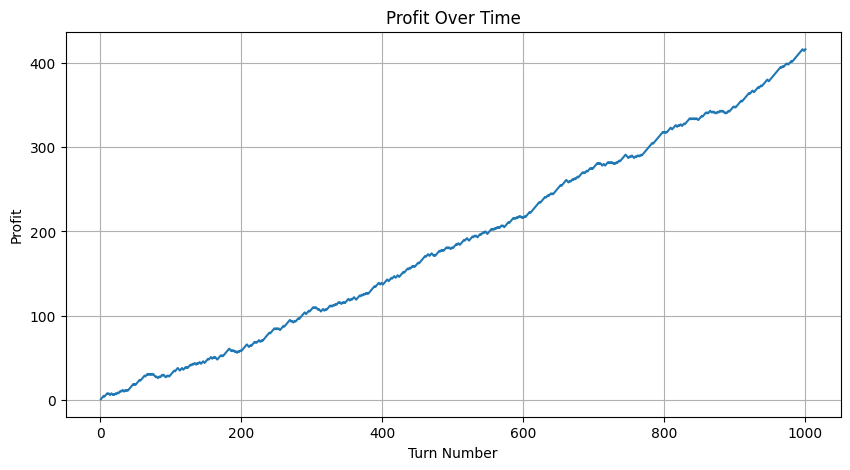

In [ ]:
# Create a list of turn numbers from 1 to N
turn_numbers = list(range(1, N + 1))

# Plot the profit over time
plt.figure(figsize=(10, 5))
plt.plot(turn_numbers, profits_over_time)
plt.xlabel("Turn Number")
plt.ylabel("Profit")
plt.title("Profit Over Time")
plt.grid(True)
plt.show()